# General Kernel Settings

In [ ]:
%load_ext autoreload
%autoreload 2

# Import Modules

In [1]:
import pandas as pd
import experiment_funcs as expf
import numpy as np
import plot_functions_nb as pf
import scipy as scy
import matplotlib.pyplot as plt
from random import sample
import matplotlib as mpl
import seaborn as sns

# Plotting

## Set Global Plotting Parameters 

In [2]:
def convertB0_mV_to_kHz(B0_mV):
    return 40.2*B0_mV+1.53

## Some Plotting Functions

In [ ]:
def sweep_plot_surf(x_data,y_data,z_data,z_data_background,data='tau',noiseType=1,sweep_type='B0_nu',
                    azim=-30):
    if len(z_data_background) == 0:
        label = "$\\tau$ ($\mu$s)"
    else:
        label = "$\\tau/\\tau_0$"
        z_data = z_data/z_data_background
    # fill up data to make parameter grid square (requirement for surface plots)
    if len(x_data) < len(y_data):
        y_data_mod = y_data
        x_data_mod = np.append(np.zeros(len(y_data)-len(x_data)),x_data)
        z_data_mod = np.append(np.zeros((len(y_data)-len(x_data),len(y_data))),z_data,axis=0)
    elif len(x_data) > len(y_data):
        x_data_mod = x_data
        y_data_mod = np.append(np.zeros(len(x_data)-len(y_data)),y_data)
        z_data_mod = np.append(np.zeros((len(x_data),len(x_data)-len(y_data))),z_data,axis=1)
    else:
        x_data_mod = x_data
        y_data_mod = y_data
        z_data_mod = z_data

    X,Y = np.meshgrid(x_data_mod,y_data_mod)
    fig,ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=300)
    
    colormap = plt.cm.jet
    
    surface_options = {
        'cmap':     colormap,
        'linewidths':   0,
        'shade':    False,
    }
    
    surf = ax.plot_surface(np.transpose(X),np.transpose(Y),z_data_mod,**surface_options)

    ax.set_zlabel(label,labelpad=-10)
    ax.view_init(elev=25,azim=azim)
    plt.xticks(rotation=-30,size=8)
    plt.yticks(rotation=30,size=8)
    ax.zaxis.set_ticklabels([])
    ax.set_xlim((min(x_data),max(x_data)))
    
    cbar_options = {
        'cmap':     colormap,
        'ticks':    np.around(np.linspace(0,np.amax(z_data_mod)+0.5,12)),
        'pad':      0.1,
        'values':   np.linspace(0,np.amax(z_data_mod)+0.5,1000),
        'shrink':   0.5,
        'location': 'top',
    }

    cbar = fig.colorbar(surf,**cbar_options)
    cbar.set_label(label=label,y=-5,labelpad=-45)
    ax.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8,
                   pad=-2)
        
    label_options = {
        'labelpad':   0,
        'fontsize':   8,
    }
    if noiseType == 1:
        ax.set_xlabel("$B_0 (kHz)$",**label_options)
        ax.set_ylabel("$\\tau_k (\mu s)$",**label_options)
    elif noiseType == 2 and sweep_type == 'B0_nu':
        ax.set_xlabel("$B_0 (kHz)$",**label_options)
        ax.set_ylabel("$\\nu$ (kHz)",**label_options)
    elif noiseType == 2 and sweep_type == 'nu_tauk':
        ax.set_xlabel("$\\nu$ (kHz)",**label_options)
        ax.set_ylabel("$\\tau_k (\mu s)$",**label_options)
    
    if data == 'tau':
        label = "$\\tau$ ($\mu$s)"
    elif data == 'omega':
        label = "$\omega$ (MHz)"

    return fig,ax

In [ ]:
def sweep_plot_contour(x_data,y_data,z_data,z_data_background,data='tau',noiseType=1,sweep_type='B0_nu'):
     
    if len(z_data_background) == 0:
        label = "$\\tau$ ($\mu$s)"
    else:
        label = "$\\tau/\\tau_0$"
        z_data = z_data/z_data_background
        
    fig,ax = plt.subplots(figsize=(10,7.5), dpi=1200)
    
    colormap = plt.cm.bone
    
    contour_options = {
        'levels':   np.linspace(0,np.amax(z_data)+0.3,100),
        'vmin':     1,
        'vmax':     np.amax(z_data),
        'cmap':     colormap,
        'alpha':     1,
    }
    cont = ax.contourf(x_data,y_data,np.transpose(z_data),**contour_options)
    
    cbar_options = {
        'cmap':     colormap,
        'ticks':    np.around(np.linspace(0,np.amax(z_data)+0.3,5),0),
        'pad':      0.13,
        'values':   np.linspace(0,np.amax(z_data)+0.3,1000),
        'shrink':   0.8,
        'location': 'top',
    }

    cbar = fig.colorbar(cont,**cbar_options)
    cbar.set_label(label=label,y=-10,labelpad=-60,fontsize=20)
    #plt.xticks(ticks=np.around(np.linspace(x_data[1],x_data[-1],6),0))
#     ytickmarks = [0.1,0.5,1,2,5,10,20]
    #ax.set_aspect(2)
#     plt.yticks(ticks=ytickmarks)
    #labelsize = 13
    #tickLabelSize = 6
    #labelpad = 2
    
    
    label_options = {
        'labelpad':   5,
        'fontsize':   20,
    }
    if noiseType == 1:
        ax.set_xlabel("$B_0 (kHz)$",**label_options)
        ax.set_ylabel("$\\tau_k (\mu s)$",**label_options)
    elif noiseType == 2 and sweep_type == 'B0_nu':
        ax.set_xlabel("$B_0 (kHz)$",**label_options)
        ax.set_ylabel("$\\nu$ (kHz)",**label_options)
    elif noiseType == 2 and sweep_type == 'nu_tauk':
        ax.set_xlabel("$\\nu$ (kHz)",**label_options)
        ax.set_ylabel("$\\tau_k (\mu s)$",**label_options)

    if data == 'tau':
        label = "$\\tau$ ($\mu$s)"
    elif data == 'omega':
        label = "$\omega$ (MHz)"
    ax.tick_params(axis='both',which='both',direction='out',top=True,bottom=True,left=True,right=True,
                   size=10)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    return fig,ax

In [ ]:
def heatmap(data,data_background, row_labels, col_labels,
            cbar_options={}, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    fontsize = 20
    fig,ax = plt.subplots(figsize=(10,7.5), dpi=600)
    # Create colorbar
    cbar_opts = {
#         'cmap':     'seismic',
        'ticks':    np.around(np.linspace(0,2,5),0),
        'pad':      0.05,
        'values':   np.linspace(0,2,1000),
        'shrink':   0.8,
        'location': 'right',
    }
    
    heatmap_opts = {
       'ax':    ax,
        'linewidths':  0.5,
        'xticklabels': row_labels,
        'yticklabels': col_labels,
        'vmin':        0,
        'vmax':        2.5
        
    }
    # Plot the heatmap
    ax = sns.heatmap(T2_arr/T2_b_arr,center=1,**heatmap_opts,cmap='seismic',square=True,
                     cbar_kws=cbar_options)
    
#     cbar_label = "$\\tau/\\tau_0$"
#     cbar = fig.colorbar(fig,**cbar_options)
#     cbar.set_label(label=label,x=0,fontsize=30,rotation=-90)

    # Show all ticks and label them with the respective list entries.
#     ax.set_xticks(np.arange(data.shape[1]), labels=col_labels,fontsize=fontsize)
#     ax.set_yticks(np.arange(data.shape[0]), labels=row_labels,fontsize=fontsize)

    # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False,size=10)

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
#              rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=0.1)
    ax.tick_params(which="minor", bottom=False, left=False)
   
    plt.savefig("G:\\Shared drives\\LFL\\Projects\\Generalized Markovian noise\\paper-figures\\noiseTypeI\\sweep\\"+"sweep1", bbox_inches="tight",
            pad_inches=0.3, transparent=True,format='eps')
    plt.show()
    return ax


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

# Random Telegraph Noise Sweep

## Sweep 1

In [ ]:
convertB0_mV_to_kHz(B0[8]*1e3)

In [ ]:
B0[8]

In [ ]:
B0 = np.linspace(0.0005,0.05,11)
tau = np.concatenate((np.linspace(0.1,2,7),np.linspace(3,20,4)))
nu = [0]
B0_kHz = [convertB0_mV_to_kHz(i) for i in B0]
detun_arr, T2_arr,  T2_b_arr, error_T2_arr, error_T2_b_arr = pf.fit_sweep(par1=B0,par2=tau,par3=nu,
            sweep='sweep_020',noiseType=1,nBackMeasurements=32,nMeasurements=256,fileformat='old')

## Contour Plots

In [ ]:
fig,ax = sweep_plot_surf(x_data=B0_kHz,y_data=tau,z_data=T2_arr,z_data_background=[],azim=-120,
                         noiseType=1,data='tau')

In [ ]:
fig,ax = sweep_plot_contour(x_data=B0_kHz,y_data=tau,z_data=T2_arr,
                z_data_background=[],data='tau',noiseType=1)

In [ ]:
B0_ext = [0.0497, 0.0622, 0.0746, 0.087 , 0.0995]
tau_ext = [3000000000000.0]
nu = [0]
B0_kHz_ext = [convertB0_mV_to_kHz(i) for i in B0_ext]

In [ ]:
detun_arr, T2_arr_ext,  T2_b_arr, error_T2_arr_ext, error_T2_b_arr = pf.fit_sweep(par1=B0_ext,par2=tau_ext,par3=nu,
            sweep='sweep_047',noiseType=1,nBackMeasurements=128,nMeasurements=128,fileformat='new')

### Plot Slices

In [ ]:
pf.plot_slice(np.append(B0_kHz[:-1],B0_kHz_ext),nu,[20],'B0',np.append(T2_arr[:-1,10],T2_arr_ext),
              np.append(error_T2_arr[:-1,10],error_T2_arr_ext))

In [ ]:
for i in range(len(tau)):
    pf.plot_slice(B0_kHz,nu,[tau[i]],'B0',T2_arr[:,i],error_T2_arr[:,i])

In [ ]:
for i in range(len(B0)):
    pf.plot_slice(B0_kHz[i],nu,tau,'tau_k',T2_arr[i,:],error_T2_arr[i,:])

### Save Figure

In [ ]:
plt.savefig('E:\\generalized-markovian-noise\\paper_figures\\sweep_contour_plot_noisetype1',dpi=300,format='eps')

# Modulated Telegraph Noise Sweep
<hr style="border:2px solid black">

## With random phase added to cosine

### $\nu$ vs $\tau_k$

In [ ]:
B0_2 = [0.05] #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_2 = [0.01,0.1,0.5,1,2,5,10,100,1e3,5e3]
tau_2 =  [0.1,0.5,1.5,3,5,10,20,100]
B0_2_kHz = [convertB0_mV_to_kHz(i) for i in B0_2]

In [ ]:
detun_arr_2, T2_arr_2,   T2_b_arr_2, error_T2_arr, error_T2_b_arr = pf.fit_sweep(par1=nu_2,
    par2=tau_2,par3=B0_2,sweep='sweep_042', noiseType=2,sweep_type='nu_tauk',nBackMeasurements=128,
        nMeasurements=128, fileformat='new', fitFunc='modDampedCos')

#### Manual Fits

In [ ]:
nu_2

In [ ]:
tau_2

In [ ]:
T2_arr_2_envelope

In [ ]:
for i in range(len(T2_arr_2_envelope)):
    T2_arr_2[8,i] = T2_arr_2_envelope[0][i]

In [ ]:
par3, T2_arr_2_envelope,   par1, par2,par4 = pf.fit_sweep(par1=[nu_2[8]],
    par2=tau_2,par3=B0_2,sweep='sweep_042', noiseType=2,sweep_type='nu_tauk',nBackMeasurements=128,
        nMeasurements=128, fileformat='new', fitFunc='envelope')

In [ ]:
fig2,ax2 = sweep_plot_contour(x_data=nu_2,y_data=tau_2,z_data=T2_arr_2,
                z_data_background=[],data='tau',noiseType=2,sweep_type='nu_tauk')

### $B_0$ vs $\nu$ ($\tau_k$ = 3 $\mu$s)

In [ ]:
B0_3 = np.linspace(0.0005,0.05,10) #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_3 = [0.01,0.1,0.5,1,2,5,10,100,1e3,5e3]
tau_3 = [3]
B0_3_kHz = [convertB0_mV_to_kHz(i) for i in B0_3]

In [ ]:
detun_arr_3, T2_arr_3,  T2_b_arr_3, error_T2_arr_3, error_T2_b_arr_3 = pf.fit_sweep(par1=B0_3,par2=nu_3,
            par3=tau_3,sweep='sweep_041', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,
            nMeasurements=128,fileformat='new', fitFunc='modDampedCos')

In [ ]:
print(nu_3,B0_3)

In [ ]:
T2_arr_3

In [ ]:
for i in range(len(T2_arr_3_envelope)):
    T2_arr_3[4+i,8] = T2_arr_3_envelope[i]

In [ ]:
par4,T2_arr_3_envelope,par3,par2,par1 = pf.fit_sweep(par1=B0_3[4:],
    par2=[nu_3[8]],par3=tau_3,sweep='sweep_041', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,
        nMeasurements=128, fileformat='new', fitFunc='envelope')

In [ ]:
fig2,ax2 = sweep_plot_contour(x_data=B0_3_kHz,y_data=nu_3,z_data=T2_arr_3,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

### $B_0$ vs $\nu$ ($\tau_k$ = $\infty$)

In [ ]:
B0_4 = np.linspace(0.0005,0.05,10) #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_4 = [0.01,0.1,0.5,1,2,5,10,100,1e3,5e3]
tau_4 = [1e5]
B0_4_kHz = [convertB0_mV_to_kHz_2(i) for i in B0_4]

In [ ]:
detun_arr_4, T2_arr_4,  T2_b_arr_4, error_T2_arr_4, error_T2_b_arr_4 = pf.fit_sweep(par1=B0_4,par2=nu_4,
            par3=tau_4,sweep='sweep_040', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,
            nMeasurements=128,fileformat='new', fitFunc='modDampedCos')

In [ ]:
print(B0_4,nu_4)

In [ ]:
for i in range(len(T2_arr_4_envelope)):
    T2_arr_4[2+i,8] = T2_arr_4_envelope[i]

In [ ]:
par4,T2_arr_4_envelope,par3,par2,par1 = pf.fit_sweep(par1=B0_4[2:],
    par2=[nu_4[8]],par3=tau_4,sweep='sweep_040', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,
        nMeasurements=128, fileformat='new', fitFunc='envelope')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_4_kHz,y_data=nu_4,z_data=T2_arr_4,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
T2_arr_4[-1,:]

In [ ]:
B0_10 = [0.0497, 0.0622, 0.0746, 0.087 , 0.0995] #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_10 = [ 500., 1000., 1250., 1500., 1750., 2000., 3000.]
tau_10 = [3e12]
B0_10_kHz = [convertB0_mV_to_kHz_old(i) for i in B0_10]

In [ ]:
B0_10_kHz

In [ ]:
detun_arr_10, T2_arr_10,  T2_b_arr_10, error_T2_arr_10, error_T2_b_arr_10 = pf.fit_sweep(par1=B0_10,
        par2=nu_10,par3=tau_10,sweep='sweep_046', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,
            nMeasurements=128,fileformat='new', fitFunc='envelope')

In [ ]:
T2_arr_10[:,0]

In [ ]:
T2_arr_10[,0]

In [ ]:
T2_arr_10[0,1] = 9.1

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_10_kHz,y_data=nu_10[1:],z_data=T2_arr_10[:,1:],
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
B0_11 = [0.0006, 0.0062, 0.0124, 0.0248, 0.0311, 0.0373, 0.0497] #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_11 = [  12.5,  125. ,  250. ,  500. ,  625. ,  750. , 1000. , 4000. ]
tau_11 = [3000000000000.0]
B0_11_kHz = [convertB0_mV_to_kHz(i) for i in B0_11]

In [ ]:
detun_arr_11, T2_arr_11,  T2_b_arr_11, error_T2_arr_11, error_T2_b_arr_11 = pf.fit_sweep(par1=B0_11,
    par2=nu_11,par3=tau_11,sweep='sweep_048', noiseType=2, sweep_type='B0_nu', nBackMeasurements=128,
    nMeasurements=128,fileformat='new', fitFunc='envelope')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_11_kHz,y_data=nu_11,z_data=T2_arr_11,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

## $B_0^2 = 2/9(\tau_0^-1-\tau_k^-1)^2+2\nu^2$

In [ ]:
pf.plot_single_par_point(11.644e-3,1e2,20,'sweep_051',noiseType=2,fitFunc='modDampedCos')

In [ ]:
B0_14 = [0.0006, 0.0062, 0.0124, 0.0248, 0.0311, 0.0373, 0.0497] #the relationship between B0 and frequency of oscillations is Omega_R = 25 MHz * A_q
nu_14 = [  12.5,  125. ,  250. ,  500. ,  625. ,  750. , 1000. , 4000. ]
tau_14 = [3000000000000.0]
B0_14_kHz = [convertB0_mV_to_kHz(i) for i in B0_14]

In [ ]:
detun_arr_14, T2_arr_14,  T2_b_arr_14, error_T2_arr_14, error_T2_b_arr_14 = pf.fit_sweep(par1=B0_14,
    par2=nu_14,par3=tau_14,sweep='sweep_051', noiseType=2, sweep_type='B0_nu', nBackMeasurements=128,
    nMeasurements=128,fileformat='new', fitFunc='modDampedCos')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_11_kHz,y_data=nu_11,z_data=T2_arr_11,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

## Without Random Phase

### $B_0$ vs $\nu$ ($\tau_k$ = 3 $\mu$s)

In [ ]:
B0_5 = np.linspace(0.0005,0.05,11)
nu_5 = np.concatenate((np.linspace(0.1,2,4),np.linspace(3,100,6),[1000]))
tauk_5 = [3]
B0_5_kHz = [convertB0_mV_to_kHz(i) for i in B0_5]

In [ ]:
detun_arr_5, T2_arr_5, T2_b_arr_5, error_T2_arr_5, error_T2_b_arr_5 = pf.fit_sweep(par1=B0_5,par2=nu_5,
        par3=tauk_5,sweep='sweep_030',sweep_type='B0_nu',fitFunc='modDampedCos',noiseType=2,
        fileformat='new')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_5_kHz,y_data=nu_5,z_data=T2_arr_5,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
fig3,ax3 = sweep_plot_surf(x_data=B0_5_kHz,y_data=nu_5,z_data=T2_arr_5,azim=-210,
                z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

### $B_0$ vs $\nu$ ($\tau_k$ = $\infty$)

In [ ]:
B0_6 = np.linspace(0.0005,0.05,11)
nu_6 = np.concatenate((np.linspace(0.1,2,4),np.linspace(3,100,6),[1000]))
tauk_6 = [10000]
B0_6_kHz = [convertB0_mV_to_kHz(i) for i in B0_6]

In [ ]:
detun_arr_6, T2_arr_6, T2_b_arr_6, error_T2_arr_6, error_T2_b_arr_6 = pf.fit_sweep(par1=B0_6,par2=nu_6,
    par3=tauk_6,sweep='sweep_031',sweep_type='B0_nu',fitFunc='modDampedCos',noiseType=2)

In [ ]:
fig4,ax4 = sweep_plot_surf(x_data=B0_6_kHz,y_data=nu_6,z_data=T2_arr_6,azim=-200,
                    z_data_background=[],data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
fig4,ax4 = sweep_plot_contour(x_data=B0_6_kHz,y_data=nu_6,z_data=T2_arr_6,
                z_data_background=T2_b_arr_6,data='tau',noiseType=2,sweep_type='B0_nu')

### $\nu$ vs $\tau_k$

In [ ]:
B0_7 = [0.05]
tau_7 = [0.1,1,1.5,5,10,1000]
nu_7 = np.concatenate((np.linspace(0.1,2,5),np.linspace(3,20,4),np.linspace(25,100,5),[1000]))
B0_7_kHz = [convertB0_mV_to_kHz(i) for i in B0_7]

In [ ]:
detun_arr_7, T2_arr_7, T2_b_arr_7, error_T2_arr_7, error_T2_b_arr_7 = pf.fit_sweep(par1=nu_7,par2=tau_7,
        par3=B0_7,sweep='sweep_029',sweep_type='nu_tauk',fitFunc='modDampedCos', noiseType=2)

In [ ]:
detun_arr_7_env, T2_arr_7_env, T2_b_arr_7_env, error_T2_arr_7_env, error_T2_b_arr_7_env = pf.fit_sweep(
    par1=nu_7,par2=tau_7,par3=B0_7,sweep='sweep_029',sweep_type='nu_tauk',fitFunc='envelope', 
    noiseType=2)

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=nu_7[:-1],y_data=tau_7[:-1],z_data=T2_arr_7[:-1,:-1],
                              z_data_background=[],data='tau',noiseType=2,sweep_type='nu_tauk')

In [ ]:
fig6,ax6 = sweep_plot_surf(x_data=nu_7[:-1],y_data=tau_7[:-1],z_data=T2_arr_7[:-1,:-1],azim=-70,
                           z_data_background=[],data='tau',noiseType=2,sweep_type='nu_tauk')

# No White Noise

## Echo Data

In [ ]:
B0_8 = np.linspace(0.0005,0.1,9)
nu_8 = [0,0.01,0.1,1,10,100,1e3,10e3,20e3]
tauk_8 = [1e12] 
B0_8_kHz = [convertB0_mV_to_kHz(i) for i in B0_8]

In [ ]:
detun_arr_8, T2_arr_8, T2_b_arr_8, error_T2_arr_8, error_T2_b_arr_8 = pf.fit_sweep(B0_8,
    nu_8,tauk_8,sweep='sweep_001',sequence='echo',nMeasurements=64,nBackMeasurements=8,
   noiseType=2,fileformat='new', fitFunc='echo',sweep_type='B0_nu')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_8*1e3,y_data=nu_8[:-1],z_data=T2_arr_8[0][:,:-1],
                z_data_background=T2_b_arr_8[:,:-1],data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
fig3,ax3 = sweep_plot_surf(x_data=B0_8*1e3,y_data=nu_8[:-1],z_data=T2_arr_8[0][:,:-1],azim=-150,
                z_data_background=T2_b_arr_8[:,:-1],data='tau',noiseType=2,sweep_type='B0_nu')

### Slice Plots

In [ ]:
for i in range(len(nu_8)):
    pf.plot_slice(B0_8,nu_8[i],tauk_8,'B0',T2_arr_8[0][i,:]/T2_b_arr_8[i,:],0)

In [ ]:
for i in range(len(B0_8)):
    pf.plot_slice(B0_8[i],nu_8[:-4],tauk_8,'nu',T2_arr_8[0][i,:-4],0)

In [ ]:
B0_kHz = [25,100,500,1000,1500,2000,2500,3000,3500,4000]
B0_9 = [0.0006, 0.0024, 0.0124, 0.0248, 0.0373, 0.0497, 0.0622, 0.0746, 0.087 , 0.0995]
nu_9 = [i/2 for i in B0_kHz]
tauk_9 = [1e12]

In [ ]:
detun_arr_9, T2_arr_9, T2_b_arr_9, error_T2_arr_9, error_T2_b_arr_9 = pf.fit_sweep(B0_9,
    nu_9,tauk_9,sweep='sweep_002',sequence='echo',nMeasurements=128,nBackMeasurements=32,
   noiseType=2,fileformat='new', fitFunc='echo',sweep_type='B0_nu')

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_kHz,y_data=nu_9,z_data=T2_arr_9[0],
                z_data_background=T2_b_arr_9,data='tau',noiseType=2,sweep_type='B0_nu')

In [ ]:
fig3,ax3 = sweep_plot_surf(x_data=B0_kHz,y_data=nu_9,z_data=T2_arr_9[0],azim=-150,
                z_data_background=T2_b_arr_9,data='tau',noiseType=2,sweep_type='B0_nu')

# Wiener-Kinchin Generated Noise

## NoiseType I

In [ ]:
B0_12 = [0.0006, 0.0124, 0.0248, 0.0373, 0.0497, 0.0746, 0.0995]
nu_12 = [0]
tau_12 = [0.1, 10, 100, 1000, 10000000000.0]
B0_12_kHz = [convertB0_mV_to_kHz(i) for i in B0_12]

In [ ]:
detun_arr_12, T2_arr_12,  T2_b_arr_12, error_T2_arr_12, error_T2_b_arr_12 = pf.fit_sweep(B0_12,tau_12,
  nu_12,sweep='sweep_049', noiseType=2,sweep_type='B0_tauk',nBackMeasurements=128,nMeasurements=128,
            fileformat='new',fitFunc='envelope')

In [ ]:
T2_arr_12[2,-1] = 5

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_12_kHz,y_data=np.log10(tau_12),z_data=T2_arr_12,
                z_data_background=[],data='tau',noiseType=1,sweep_type='B0_tauk')
ax3.set_ylabel('$log\\tau_k$')

## NoiseType II

In [ ]:
B0_13 = [0.0006, 0.0124, 0.0248, 0.0373, 0.0497, 0.0746, 0.0995]
nu_13 = [12.5,250,500,750,1000,1500,2000,8e3]
tau_13 = [3e12]
B0_13_kHz = [convertB0_mV_to_kHz(i) for i in B0_13]

In [ ]:
detun_arr_13, T2_arr_13,  T2_b_arr_13, error_T2_arr_13, error_T2_b_arr_13 = pf.fit_sweep(B0_13,nu_13,tau_13,
  sweep='sweep_050', noiseType=2,sweep_type='B0_nu',nBackMeasurements=128,nMeasurements=128,
            fileformat='new',fitFunc='envelope')

In [ ]:
T2_arr_13[0,:] = 1

In [ ]:
fig3,ax3 = sweep_plot_contour(x_data=B0_13_kHz,y_data=nu_13,z_data=T2_arr_13,
                z_data_background=[],data='tau',noiseType=1,sweep_type='B0_tauk')

# Checking the Markovianity of the Environment

In [ ]:
awg_rate_arr = np.zeros(8)
for i in range(8):
    awg_rate_arr[i] = 2.4e6*2**(-float(i+1))
print(awg_rate_arr)
data_arr = np.zeros((len(awg_rate_arr),56))
tau_arr = np.zeros(len(awg_rate_arr))
error_arr = np.zeros(len(awg_rate_arr))

for i in range(len(awg_rate_arr)):
    data = pd.read_csv("E:\\generalized-markovian-noise\\CandleQubit_6\\ramsey\\markovianity_check\\markovianity_check_data_awg_rate_%03d_kHz.csv"%awg_rate_arr[i],nrows=1e3+1,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
    time_arr = data[0,:]
    data_arr[i-1,:] = np.mean(data[1:,:],axis=0)
    fitted_pars,error = pf.fit_data(time_arr,data_arr[i-1,:],sequence='echo',dt=time_arr[-1]/len(time_arr),
                                   noiseType=1)
    tau_arr[i-1] = fitted_pars[1]
    error_arr[i-1] = error[1]

In [ ]:
err_plt_options  = {
        'ecolor':      'r',
        'elinewidth':   2,
        'fmt':          '-o',
        'color':        'b',
        'capsize':      5,
        }
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x=awg_rate_arr[:-1]*1e-6,y=tau_arr[:-1],yerr=error_arr[:-1],**err_plt_options)
ax.set_xlabel('Sampling Rate (GHz)',fontsize=14)
ax.set_ylabel('$\\tau_0 (\mu$s)',fontsize=14)
plt.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)
ax.invert_xaxis()

In [ ]:
for i in range(len(awg_rate_arr)):
    plt.plot(1e6*time_arr,1e3*data_arr[i,:],label='$f_s$ = %d kHz'%int(awg_rate_arr[i]))
plt.legend()
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Digitizer Voltage (mV)')
plt.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)
plt.show()

In [ ]:
sigma_arr = sigma_arr = np.linspace(0.015,0.1,10)
data_arr = np.zeros((len(sigma_arr),100))
tau_arr = np.zeros(len(sigma_arr))
error_arr = np.zeros(len(sigma_arr))

for i in range(len(sigma_arr)):
    data = pd.read_csv("E:\\generalized-markovian-noise\\CandleQubit_6\\echo\\qubitBW_meas\\sigma_%d_mV.csv"%int(sigma_arr[i]*1e3),nrows=300+1,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
    time_arr = data[0,:]
    data_arr[i-1,:] = np.mean(data[1:,:],axis=0)
    fitted_pars,error = pf.fit_data(time_arr,data_arr[i-1,:],sequence='echo',dt=time_arr[-1]/len(time_arr))
    tau_arr[i-1] = fitted_pars[1]
    error_arr[i-1] = error[1]

In [ ]:
err_plt_options  = {
        'ecolor':      'r',
        'elinewidth':   2,
        'fmt':          '-o',
        'color':        'b',
        'capsize':      5,
        }
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sigma_arr*1e3,tau_arr)
ax.set_xlabel('Noise Amplitude (mV)',fontsize=14)
ax.set_ylabel('$T_2^E$',fontsize=14)
plt.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)
ax.invert_xaxis()

In [ ]:
for i in range(7):
    plt.plot(1e6*time_arr,1e3*data_arr[i,:],label='$\sigma$ = %d kHz'%int(sigma_arr[i]*1e3))
plt.legend()
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Digitizer Voltage (mV)')
plt.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)
plt.show()

## $\omega_{AC}$ = 3.383 GHz

In [ ]:
pf.plot_single_par_point(100e-3,0,3e12,'sweep_063',noiseType=1,nMeasurements=100,nBackMeasurements=100)

In [ ]:
pf.plot_single_par_point(100e-3,0,3e12,'sweep_060',noiseType=1,nMeasurements=100,nBackMeasurements=100)

In [ ]:
B0_14 = [0.0006, 0.0024, 0.0062, 0.0124, 0.0186, 0.0248, 0.0373, 0.0497, 0.0746, 0.0995]
tau_14 = [ 0.1 ,  1.05,  2.  ,  3.  ,  5.5 ,  8.  , 20.  ]
nu_14 = [0]
B0_kHz_14 = [convertB0_mV_to_kHz(i) for i in B0_14]

In [ ]:
detun_arr_14, T2_arr_14,  T2_b_arr_14, error_T2_arr_14, error_T2_b_arr_14 = pf.fit_sweep(par1=B0_14,
        par2=tau_14,par3=nu_14,sweep='sweep_061',noiseType=1,nBackMeasurements=100,nMeasurements=100,
        fileformat='new')

In [ ]:
T2_arr_14

In [ ]:
fig,ax = sweep_plot_surf(x_data=B0_kHz_14,y_data=tau_14,z_data=T2_arr_14,z_data_background=T2_b_arr_14,azim=-120,
                         noiseType=1,data='tau')

### 2d contour plot

In [ ]:
fig,ax = sweep_plot_contour(x_data=B0_kHz_14,y_data=tau_14,z_data=T2_arr_14,
                z_data_background=T2_b_arr_14,data='tau',noiseType=1)
filename = 'sweep_data_RTN'
plt.savefig("E:\\generalized-markovian-noise\\paper_figures\\"+filename, bbox_inches="tight",
            pad_inches=0.3, transparent=True,format='eps')

In [ ]:
B0_15 = [0.0006, 0.0024, 0.0062, 0.0124, 0.0186, 0.0248, 0.0373, 0.0497, 0.0746, 0.0995]
nu_15 = [1.25e+01,5.0e+01,1.25e+02,2.5e+02,3.75e+02,5.0e+02,7.5e+02,1.0e+03,1.25e+03,1.5e+03,1.75e+03,
2.0e+03,3.0e+03]
tau_15 = [3e12]
B0_kHz_15 = [convertB0_mV_to_kHz(i) for i in B0_15]

In [ ]:
detun_arr_15, T2_arr_15,  T2_b_arr_15, error_T2_arr_15, error_T2_b_arr_15 = pf.fit_sweep(par1=B0_15,
        par2=nu_15,par3=tau_15,sweep='sweep_066',noiseType=2,nBackMeasurements=100,nMeasurements=100,
        fileformat='new',fitFunc='envelope',sweep_type='B0_nu')

# $B_0$ Calibration

In [ ]:
fontsize=18

In [3]:
def line(x,a,b):
    return a*x+b

In [4]:
# load data from previous measurement
iteration_rabi_power_sweep = 2
data_B0_cal = "E:\\generalized-markovian-noise\\CandleQubit_6\\Rabi\\RabiPowerSweep\\RabiPowerSweep_data_%03d.csv"%(iteration_rabi_power_sweep)
data = pd.read_csv(data_B0_cal,nrows=2,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
amp = data[0,:]*1e3
Omega_Rabi = data[1,:]
best_vals, covar = scy.optimize.curve_fit(line, amp[0:25],Omega_Rabi[0:25]/1e6,xtol=1e-6,maxfev=3000)

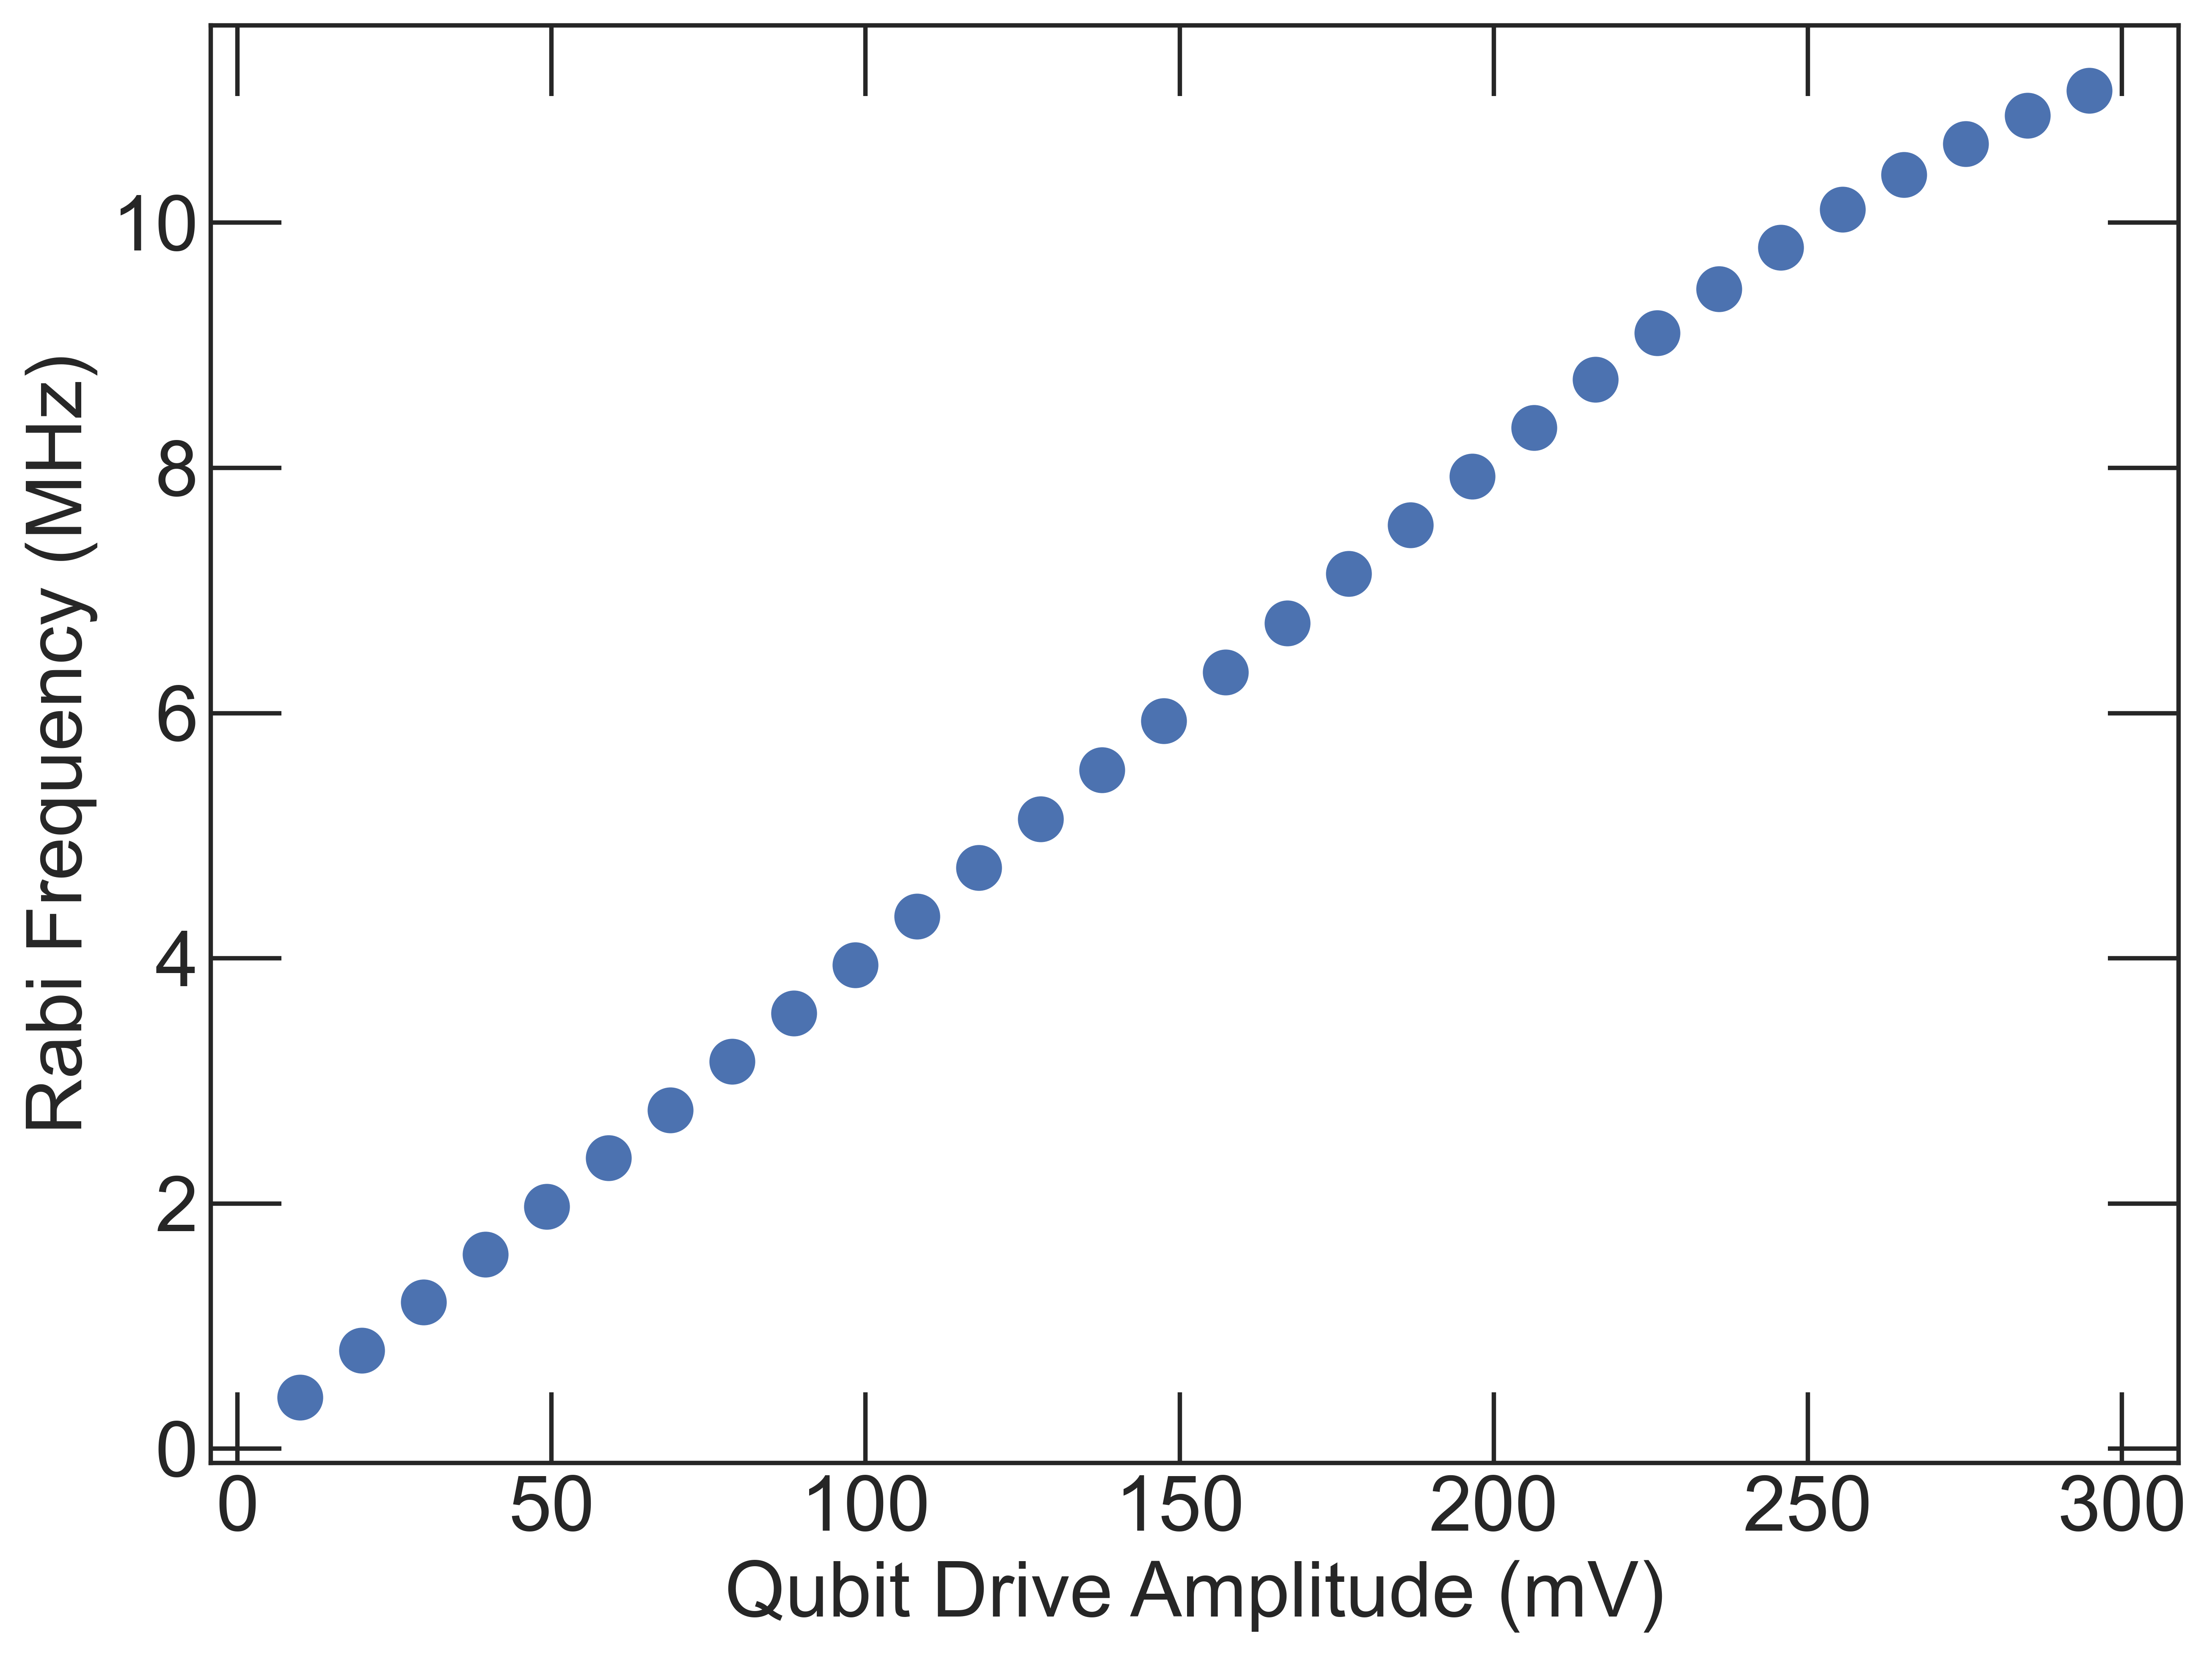

In [22]:
# plot
fig, ax1 = plt.subplots(figsize=(10,7.5),dpi=600)
# plt.xticks(np.arange(-0.1e3,1.1e3,step=0.2))
# plt.yticks(np.arange(0,12,step=2))

# left,bottom,width,height = [0.58, 0.25, 0.3, 0.4]
# ax2 = fig.add_axes([left,bottom,width,height])
ax1.plot(amp[:30],Omega_Rabi[:30]/1e6, 'o', markersize = 12, c='C0')
ax1.set_xlabel('Qubit Drive Amplitude (mV)',fontsize=22)
ax1.set_ylabel('Rabi Frequency (MHz)',fontsize=22)
# ax1.set_xticks(ticks=np.arange(0,250,step=100),labels=np.arange(0,250,step=50),fontsize=22)
# ax1.set_yticks(ticks=np.around(np.arange(0.1,12,step=2)),labels=np.around(np.arange(0.1,12,step=2)),size=22)
# ax2.plot(amp[0:35],Omega_Rabi[0:35]/1e6,'o',amp[0:35],line(amp[0:35],best_vals[0],best_vals[1]),linewidth=3)
# ax2.set_xlabel('Qubit Drive Amplitude (mV)',fontsize=16)
# ax2.set_ylabel('Rabi Frequency (MHz) ',fontsize=16)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.yticks(np.arange(0,np.max(Omega_Rabi),step=2),fontsize=9)
# inset_box_txt = '$\Omega_R=$'+"{:.2e}".format(best_vals[0])+'$\\cdot A_d +$' +"{:.2e}".format(best_vals[1])
# plt.gcf().text(0.58, 0.675, inset_box_txt, fontsize=16)
ax1.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=20)
# ax2.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=14)
plt.savefig("G:\\Shared drives\\LFL\Projects\\Generalized Markovian noise\\paper-figures\\B0_calibration\\"+"B0_calibration", bbox_inches="tight",
            pad_inches=0.3, transparent=True,format='eps')
plt.show()


# $\mu$ Calibration

In [ ]:
# load data
iteration_ramsey_mu_calibration = 1
data_mu_cal = "E:\\generalized-markovian-noise\\CandleQubit_6\\Ramsey\\AC_stark_calibrations\\mu_calibration_data_%03d.csv"%(iteration_ramsey_mu_calibration)
data = pd.read_csv(data_mu_cal,nrows=2,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
amp = data[0,:]
detun_arr = data[1,:]
# plot
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(amp*1e3,detun_arr, '-o', markersize = 5, c='r')
ax.set_ylabel('Ramsey Detuning (MHz)',fontsize=fontsize)
ax.set_xlabel('White Noise Amplitude (mV)',fontsize=fontsize)
ax.set_title('Ramsey AC stark sweep',fontsize=fontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)

# $\sigma$ Calibration

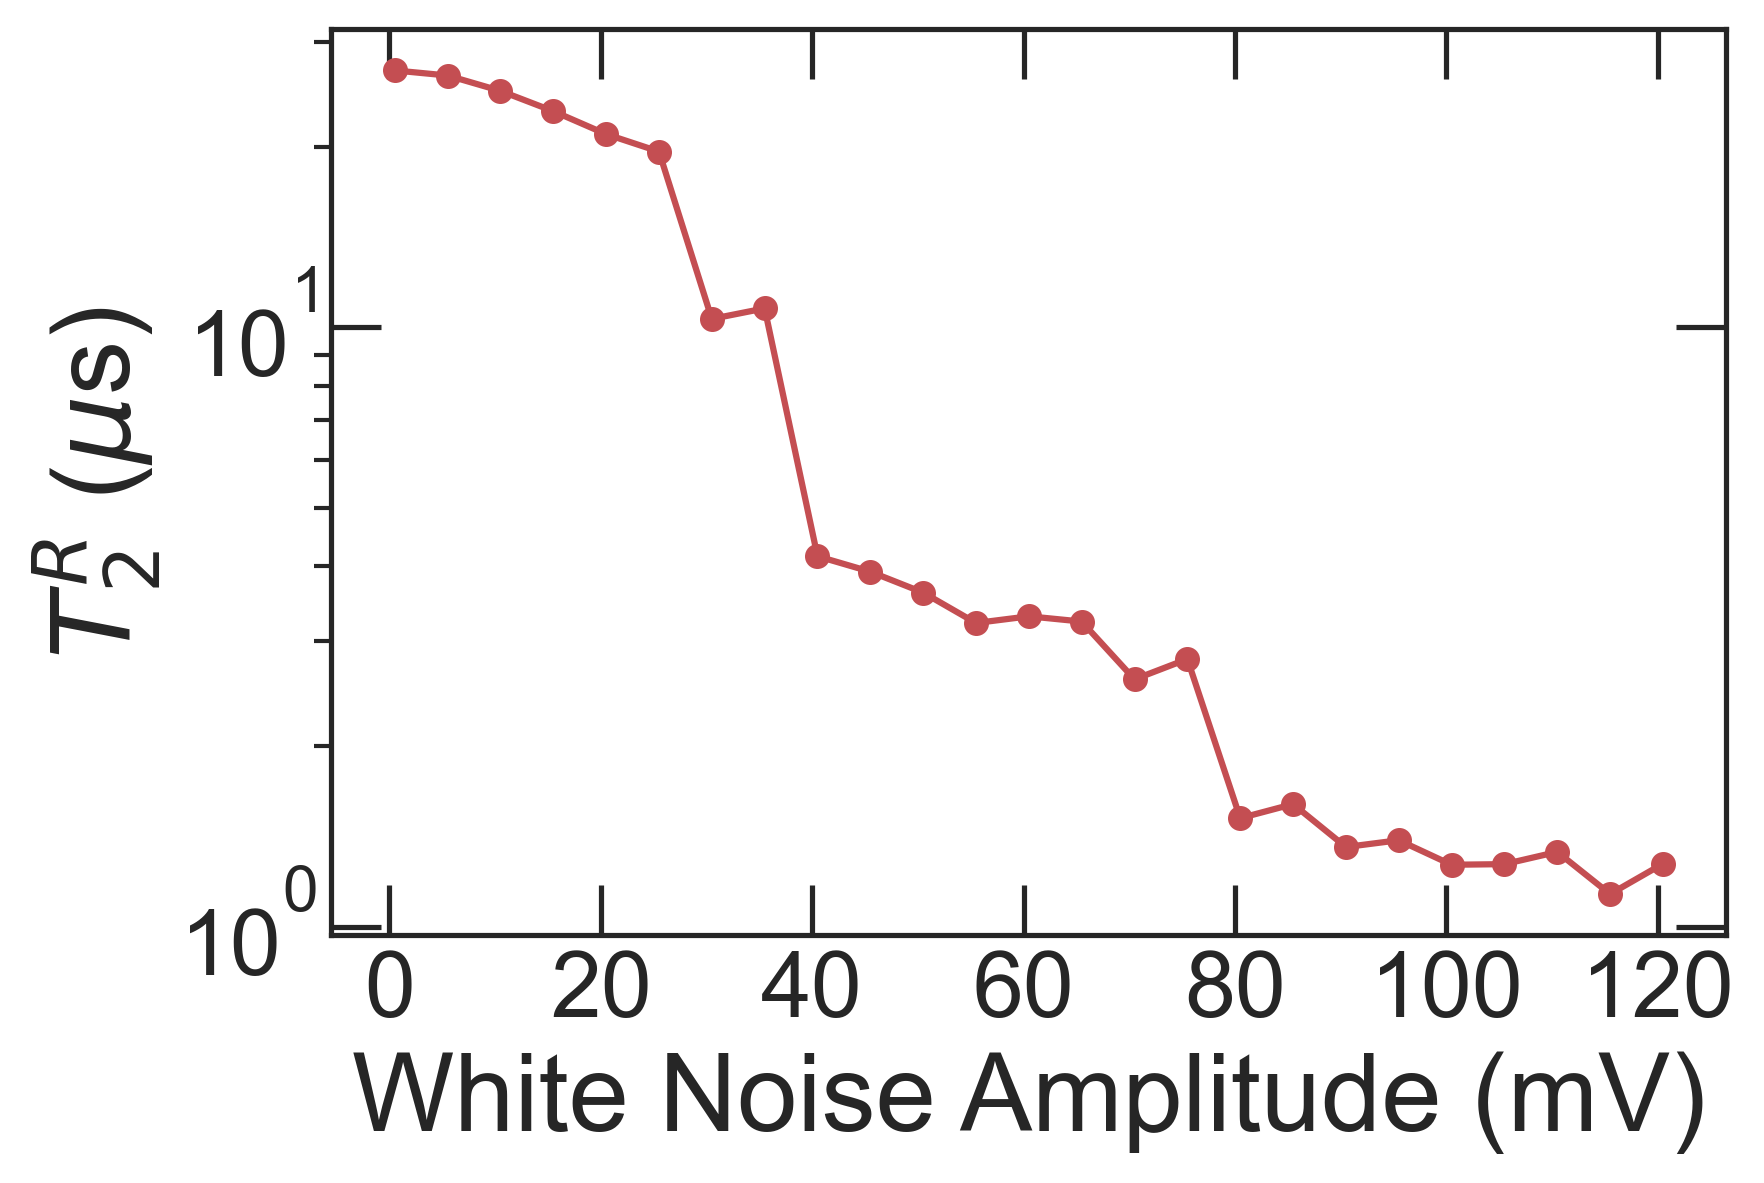

In [20]:
# load data
iteration_ramsey_sigma_calibration = 7
data_sigma_cal = "E:\\generalized-markovian-noise\\CandleQubit_6\\Ramsey\\AC_stark_calibrations\\sigma_calibration_data_%03d.csv"%(iteration_ramsey_sigma_calibration)
data = pd.read_csv(data_sigma_cal,nrows=2,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
sigma = data[0,:]
T_phi_arr = data[1,:]
# plot
fontsize = 26
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(sigma*1e3,T_phi_arr, '-o', markersize = 5, c='r')
ax.set_ylabel('$T_2^R$ ($\mu$s)',fontsize=fontsize)
ax.set_xlabel('White Noise Amplitude (mV)',fontsize=fontsize)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.set_yscale('log')
# ax.set_title('Ramsey AC Stark Sigma Calibration')
ax.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=12)
plt.savefig("G:\\Shared drives\\LFL\Projects\\Generalized Markovian noise\\paper-figures\\sigma_calibration\\"+"sigma_calibration_inset", bbox_inches="tight",
            pad_inches=0.3, transparent=True,format='eps')

# $T_2$ Statistics

In [ ]:
# load data
iteration_T2_stats = 2
data_T2_stats = "E:\\generalized-markovian-noise\\CandleQubit_6\\Ramsey\\ramsey_statistics\\ramsey_statistics_data_%03d.csv"%(iteration_T2_stats)
data = pd.read_csv(data_T2_stats,on_bad_lines='skip',skiprows=2,header=None).to_numpy(np.float64)
t_arr = data[0,:200]*1e6 # convert to us
data = data[1:,:200]*1e3 # convert to mV

In [ ]:
# load background measurements from sweep
filename = 'data_B0_500_uV_nu_0_kHz_tau_100_ns.csv'
datafile = "E:\\generalized-markovian-noise\\CandleQubit_6\\sweep_data\\ramsey\\sweep_020\\data\\%s"%(filename)
t_arr = pd.read_csv(datafile,on_bad_lines='skip',skiprows=3,header=None,nrows=1).to_numpy(np.float64)[0][:200]*1e6
data = pd.read_csv(datafile,on_bad_lines='skip',skiprows=7,header=None,nrows=32).to_numpy(np.float64)[:,:200] * 1e3

## Group Data

In [ ]:
def group_data(data,grp_size=2):
    nMeasurements = data.shape[0]
    N = data.shape[1]
    nGroups = int(nMeasurements/grp_size)
    grps = np.zeros((nGroups,N))
    for i in range(nGroups):
        grps[i,:] = np.mean(data[i*grp_size:(i+1)*grp_size,:],axis=0)
    
    return grps

## Fit data

In [ ]:
# fit data to exponential decay
def decay(x,amp,tau,offset):
    return amp*np.exp(-x/tau)+offset

In [ ]:
# get T2 from data
def get_tau0(t_arr,data):
    t_arr = t_arr
    data = data
    amp = data[0]-data[-1]
    offset = np.mean(data)
    if t_arr[-1] < 10:
        tau = 2
    else:
        tau = 10
        p0 = [amp,tau,offset]
    try:
        fitted_pars, covar = scy.optimize.curve_fit(decay, t_arr, data,xtol=1e-6,maxfev=6000)
        T2 = fitted_pars[1]
        error = sum(np.sqrt(abs(np.diag(covar))))
    except:
        print('fitting failed')
        fitted_pars = np.zeros(3)
        T2 = 0
        error = 20*sum(np.ones(3))
        
    return T2,error

## Split data into groups and fit

In [ ]:
# split data into groups, fit, repeat for different group size
grp_size_arr = np.arange(15,data.shape[0]+1,step=3)
T2,error = get_tau0(t_arr,np.mean(data,axis=0))
var = []
for i in grp_size_arr:
    dist = 0
    grps = group_data(data,i)
    for j in range(grps.shape[0]):
        T2_grp,error_grp = get_tau0(t_arr,grps[j,:])
        dist += ((T2-T2_grp)**2)
    var.append(dist/grps.shape[0])

## Plot Results

In [ ]:
# plot variance as a function of number of measurements
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(grp_size_arr[10:],np.sqrt(var[10:]),'-o',c='b')
#ax.plot(samples_arr,variance_arr[0]/np.sqrt(samples_arr)+2,c='r',linewidth=2)
ax.set_xlabel('Group Size')
ax.set_ylabel('$\sigma^2$($\mu s^2$)')
ax.tick_params(axis='both',direction='in',bottom=True, top=True, left=True, right=True,size=8)

In [ ]:
x = np.linspace(0,10,1001)
y = 1/np.sqrt(2)*(x-np.sqrt(2/9))
plt.plot(x,y)
plt.show()